In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import numpy as np
import pandas as pd

In [6]:
import random
np.random.seed(1234)
random.seed(1234)

In [7]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
submission = pd.read_csv("sampleSubmission.csv")

In [8]:
train_df.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [9]:
train_df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [10]:
#各変数の方の確認
train_df.dtypes

id          int64
feat_1      int64
feat_2      int64
feat_3      int64
feat_4      int64
            ...  
feat_90     int64
feat_91     int64
feat_92     int64
feat_93     int64
target     object
Length: 95, dtype: object

In [11]:
#targetの各分類ごとの個数を確認
train_df["target"].value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

In [12]:
#学習データとテストデータの連結
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [13]:
all_df

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206241,144364,0,0,0,0,0,0,0,0,0,...,0,2,1,1,0,0,0,0,0,NaN
206242,144365,0,0,0,0,0,0,0,0,0,...,1,4,1,11,0,0,0,0,0,NaN
206243,144366,0,1,0,0,0,0,1,1,0,...,1,3,1,1,0,0,1,0,0,NaN
206244,144367,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,1,0,NaN


In [65]:
#カテゴリ変数を数値に変換
from sklearn.preprocessing import LabelEncoder
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['target'], dtype='object')


In [66]:
all_df["target"][all_df["target"] == "Class_1" ] = 0
all_df["target"][all_df["target"] == "Class_2" ] = 1
all_df["target"][all_df["target"] == "Class_3"] = 2
all_df["target"][all_df["target"] == "Class_4" ] = 3
all_df["target"][all_df["target"] == "Class_5" ] = 4
all_df["target"][all_df["target"] == "Class_6"] = 5
all_df["target"][all_df["target"] == "Class_7" ] = 6
all_df["target"][all_df["target"] == "Class_8" ] = 7
all_df["target"][all_df["target"] == "Class_9"] = 8

all_df


<ipython-input-66-2201f23cdad0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df["target"][all_df["target"] == "Class_1" ] = 0
<ipython-input-66-2201f23cdad0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df["target"][all_df["target"] == "Class_2" ] = 1
<ipython-input-66-2201f23cdad0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df["target"][all_df["target"] == "Class_3"] = 2
<ipython-input-66-2201f23cdad0>:4: Set

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206241,144364,0,0,0,0,0,0,0,0,0,...,0,2,1,1,0,0,0,0,0,NaN
206242,144365,0,0,0,0,0,0,0,0,0,...,1,4,1,11,0,0,0,0,0,NaN
206243,144366,0,1,0,0,0,0,1,1,0,...,1,3,1,1,0,0,1,0,0,NaN
206244,144367,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,1,0,NaN


In [67]:
all_df["target"].value_counts()

1    16122
5    14135
7     8464
2     8004
8     4955
6     2839
4     2739
3     2691
0     1929
Name: target, dtype: int64

In [68]:
#データをtrain_dfとtest_dfに戻す
train_df_le = all_df[~all_df["target"].isnull()]
test_df_le = all_df[all_df["target"].isnull()]

In [69]:
import lightgbm as lgb

In [70]:
#クロスバリデーション用のライブラリを読み込んで分割数を3に設定
from sklearn.model_selection import KFold
folds = 3
kf = KFold(n_splits=folds)

In [71]:
#ハイパーパラメータの設定
lgbm_params = {
    "objective":"multiclass",
    "random_seed":1234,
    "num_class":9
}

In [18]:
#説明変数、目的変数を指定
train_X = train_df_le.drop(["target", "id"], axis=1)
train_Y = train_df_le["target"]

In [22]:
#各foldごとに作成したモデルごとの予測値を保存
models = []

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                         )
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    models.append(model_lgb) 

ValueError: Series.dtypes must be int, float or bool

In [23]:
train_Y

0        0
1        0
2        0
3        0
4        0
        ..
61873    8
61874    8
61875    8
61876    8
61877    8
Name: target, Length: 61878, dtype: object

In [72]:
for cat in categories:
    le = LabelEncoder()
    le = le.fit(train_df[cat])
    train_df_le[cat] = le.transform(train_df[cat])

<ipython-input-72-5044061ad317>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_le[cat] = le.transform(train_df[cat])


In [73]:
#説明変数、目的変数を指定
train_X = train_df_le.drop(["target", "id"], axis=1)
train_Y = train_df_le["target"]

In [74]:
train_Y

0        0
1        0
2        0
3        0
4        0
        ..
61873    8
61874    8
61875    8
61876    8
61877    8
Name: target, Length: 61878, dtype: int32

In [75]:
#各foldごとに作成したモデルごとの予測値を保存
models = []

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                         )
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    models.append(model_lgb) 

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3160
[LightGBM] [Info] Number of data points in the train set: 41252, number of used features: 93
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -2.027945
[LightGBM] [Info] Start training from score -2.729787
[LightGBM] [Info] Start training from score -2.712107
[LightGBM] [Info] Start training from score -1.071046
[LightGBM] [Info] Start training from score -2.676248
[LightGBM] [Info] Start training from score -1.583878
[LightGBM] [Info] Start training from score -2.119302
Training until validation scores don't improve for 20 rounds
[10]	valid_0's multi_logloss: 30.3204
[20]	valid_0's multi_logloss: 30.2912
[30]	valid_0's mult

In [107]:
y_valid.shape

(20626,)

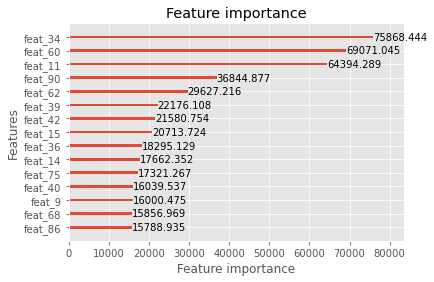

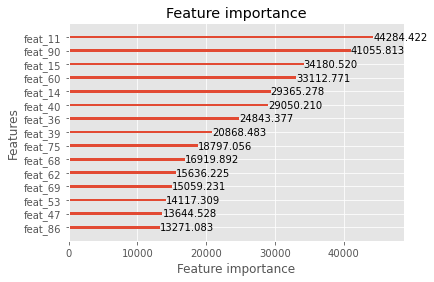

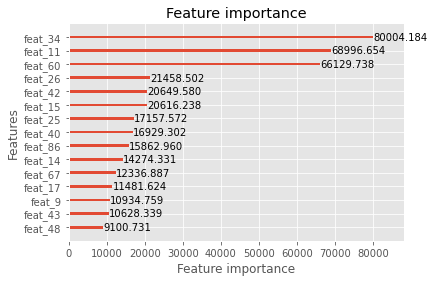

In [28]:
#変数の数を制限して各変数の重要度を確認
for model in models:
    lgb.plot_importance(model,importance_type="gain",max_num_features=15)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, np.round(y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [76]:
test_X = test_df_le.drop(["target", "id"], axis=1)

In [77]:
test_X

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
61878,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
61879,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
61880,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
61881,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
61882,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206241,0,0,0,0,0,0,0,0,0,1,...,0,0,2,1,1,0,0,0,0,0
206242,0,0,0,0,0,0,0,0,0,0,...,0,1,4,1,11,0,0,0,0,0
206243,0,1,0,0,0,0,1,1,0,0,...,0,1,3,1,1,0,0,1,0,0
206244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,1,0


In [78]:
#テストデータの結果を予測して格納
preds = []
for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

In [79]:
#予測結果の平均をとる
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

In [80]:
preds_mean

array([[3.80283587e-04, 2.79094743e-01, 1.36701079e-01, ...,
        3.07837341e-02, 1.37361849e-03, 1.55435482e-04],
       [1.78906536e-03, 1.04206160e-02, 6.30515293e-03, ...,
        1.41184551e-03, 3.50485207e-01, 3.46598974e-03],
       [3.98489293e-05, 5.29513950e-05, 6.50355456e-05, ...,
        6.52065633e-05, 5.31790843e-04, 8.44828751e-06],
       ...,
       [3.49279724e-04, 4.92848414e-01, 3.56685566e-01, ...,
        2.36987762e-03, 5.09285738e-04, 1.48073465e-04],
       [2.06428369e-04, 3.77863579e-01, 2.00222480e-02, ...,
        6.19692064e-04, 1.15504157e-04, 9.06338920e-05],
       [2.63406925e-04, 4.05404174e-01, 4.22882357e-01, ...,
        1.00105519e-01, 4.37260674e-04, 1.74404279e-04]])

In [81]:
preds_mean.shape

(144368, 9)

In [41]:
preds_array

array([[[3.54936784e-16, 3.54936784e-16, 9.97861279e-02, ...,
         1.99354126e-02, 1.48264170e-03, 2.27445273e-04],
        [1.84447820e-15, 1.84447820e-15, 1.07368943e-02, ...,
         1.51627824e-03, 4.31906318e-01, 7.40915187e-03],
        [1.73566102e-17, 1.73566102e-17, 1.05550202e-04, ...,
         3.86415681e-05, 5.04140875e-04, 1.67340077e-05],
        ...,
        [4.12932455e-16, 4.12932455e-16, 7.10100177e-01, ...,
         2.40165084e-03, 9.04872094e-04, 1.54566796e-04],
        [1.14022247e-16, 1.14022247e-16, 2.73857031e-02, ...,
         4.98977946e-04, 1.17590417e-04, 1.16325065e-04],
        [4.98164091e-16, 4.98164091e-16, 5.89181792e-01, ...,
         2.50115244e-01, 6.66260604e-04, 2.41961972e-04]],

       [[9.06660957e-04, 7.14018364e-01, 2.08418612e-01, ...,
         7.24157898e-02, 2.63821378e-03, 2.38861173e-04],
        [5.25956842e-03, 2.82169873e-02, 7.94091963e-03, ...,
         2.71925831e-03, 6.19549303e-01, 2.98881735e-03],
        [5.68493784e-05, 

In [63]:
submission["Class_1"] = preds_mean[0]

ValueError: Length of values (0) does not match length of index (144368)

In [45]:
models

In [59]:
submission.shape

(144368, 10)

In [60]:
submission

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,1,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
144363,144364,1,0,0,0,0,0,0,0,0
144364,144365,1,0,0,0,0,0,0,0,0
144365,144366,1,0,0,0,0,0,0,0,0
144366,144367,1,0,0,0,0,0,0,0,0


In [61]:
submission = submission.drop(["id"], axis=1)

In [62]:
submission

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
144363,1,0,0,0,0,0,0,0,0
144364,1,0,0,0,0,0,0,0,0
144365,1,0,0,0,0,0,0,0,0
144366,1,0,0,0,0,0,0,0,0


In [82]:
preds_mean = preds_mean.T

In [70]:
submission["Class_1"] = preds_mean[0]
submission["Class_2"] = preds_mean[1]
submission["Class_3"] = preds_mean[2]
submission["Class_4"] = preds_mean[3]
submission["Class_5"] = preds_mean[4]
submission["Class_6"] = preds_mean[5]
submission["Class_7"] = preds_mean[6]
submission["Class_8"] = preds_mean[7]
submission["Class_9"] = preds_mean[8]

In [83]:
preds_mean.shape

(9, 144368)

In [76]:
submission

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0.000380,0.279095,0.136701,0.550185,7.042159e-06,0.001320,0.030784,0.001374,0.000155
1,2,0.001789,0.010421,0.006305,0.000943,1.411472e-04,0.625038,0.001412,0.350485,0.003466
2,3,0.000040,0.000053,0.000065,0.000023,6.839327e-07,0.999213,0.000065,0.000532,0.000008
3,4,0.000107,0.480144,0.503632,0.008415,9.257400e-06,0.000240,0.000244,0.000183,0.007025
4,5,0.399663,0.000819,0.000495,0.000183,4.920612e-05,0.008061,0.005774,0.128950,0.456006
...,...,...,...,...,...,...,...,...,...,...
144363,144364,0.568053,0.006346,0.005697,0.009690,6.039684e-05,0.290446,0.047037,0.024331,0.048340
144364,144365,0.001282,0.329229,0.496622,0.078932,1.647133e-05,0.001489,0.091603,0.000488,0.000340
144365,144366,0.000349,0.492848,0.356686,0.146395,1.434040e-05,0.000680,0.002370,0.000509,0.000148
144366,144367,0.000206,0.377864,0.020022,0.600916,3.436174e-06,0.000162,0.000620,0.000116,0.000091


In [77]:
submission.to_csv("submit_light.csv",index=False)

In [73]:
submission = pd.read_csv("sampleSubmission.csv")

In [75]:
submission["Class_1"] = preds_mean[0]
submission["Class_2"] = preds_mean[1]
submission["Class_3"] = preds_mean[2]
submission["Class_4"] = preds_mean[3]
submission["Class_5"] = preds_mean[4]
submission["Class_6"] = preds_mean[5]
submission["Class_7"] = preds_mean[6]
submission["Class_8"] = preds_mean[7]
submission["Class_9"] = preds_mean[8]

In [2]:
from sklearn.linear_model import LogisticRegression

In [44]:
clf = LogisticRegression(penalty='l2', solver='sag', random_state=0, multi_class="multinomial")

In [20]:
train_df_le

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,8
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,8
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,8
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,8


In [29]:
train_X = train_df_le.drop(["target", "id"], axis=1)
train_Y = train_df_le["target"]

In [30]:
train_X

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0
61874,4,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,2,0,0,1,0
61875,0,0,0,0,0,0,0,3,1,0,...,0,0,3,1,0,0,0,0,0,0
61876,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,3,10,0


In [31]:
train_Y

0        0
1        0
2        0
3        0
4        0
        ..
61873    8
61874    8
61875    8
61876    8
61877    8
Name: target, Length: 61878, dtype: int32

In [45]:
#ロジスティック回帰
clf.fit(train_X, train_Y)

C:\Users\yamauchiyusuke74\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(multi_class='multinomial', random_state=0, solver='sag')

In [43]:
test_X

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
61878,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
61879,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
61880,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
61881,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
61882,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206241,0,0,0,0,0,0,0,0,0,1,...,0,0,2,1,1,0,0,0,0,0
206242,0,0,0,0,0,0,0,0,0,0,...,0,1,4,1,11,0,0,0,0,0
206243,0,1,0,0,0,0,1,1,0,0,...,0,1,3,1,1,0,0,1,0,0
206244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,1,0


In [46]:
y_pred = clf.predict(test_X)

In [47]:
y_pred

array([3, 7, 5, ..., 2, 1, 1])

In [48]:
y_pred.shape

(144368,)

In [49]:
#存在確率
probs = clf.predict_proba(test_X)

In [50]:
probs

array([[8.58378033e-06, 2.05263040e-01, 3.41899750e-01, ...,
        8.02830776e-03, 4.22423891e-07, 3.75121529e-08],
       [8.69077654e-04, 1.20574494e-04, 1.33114224e-06, ...,
        2.89469250e-04, 5.06955157e-01, 9.41886398e-04],
       [3.61613850e-06, 6.35719900e-07, 2.78901817e-07, ...,
        1.04262656e-04, 7.78828333e-05, 2.92190490e-06],
       ...,
       [4.27938771e-10, 2.47876528e-01, 5.90533676e-01, ...,
        1.93025900e-03, 1.08536728e-09, 2.23966578e-09],
       [1.00020490e-05, 7.32286422e-01, 1.44271534e-01, ...,
        9.88776154e-04, 6.57831038e-05, 2.42261297e-05],
       [4.24956902e-04, 4.51101869e-01, 4.03666864e-01, ...,
        6.41339831e-02, 3.36687745e-05, 8.42696835e-05]])

In [51]:
probs.shape

(144368, 9)

In [60]:
sub = pd.read_csv("sampleSubmission.csv")

In [61]:
sub

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,1,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
144363,144364,1,0,0,0,0,0,0,0,0
144364,144365,1,0,0,0,0,0,0,0,0
144365,144366,1,0,0,0,0,0,0,0,0
144366,144367,1,0,0,0,0,0,0,0,0


In [53]:
sub = sub.drop(["id"], axis=1)

In [54]:
sub

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
144363,1,0,0,0,0,0,0,0,0
144364,1,0,0,0,0,0,0,0,0
144365,1,0,0,0,0,0,0,0,0
144366,1,0,0,0,0,0,0,0,0


In [55]:
probs = probs.T

In [56]:
probs.shape

(9, 144368)

In [62]:
sub["Class_1"] = probs[0]
sub["Class_2"] = probs[1]
sub["Class_3"] = probs[2]
sub["Class_4"] = probs[3]
sub["Class_5"] = probs[4]
sub["Class_6"] = probs[5]
sub["Class_7"] = probs[6]
sub["Class_8"] = probs[7]
sub["Class_9"] = probs[8]

In [63]:
sub.to_csv('submission_log.csv', index=False)

In [64]:
sub

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,8.583780e-06,2.052630e-01,3.418998e-01,4.447847e-01,6.791258e-10,1.518540e-05,8.028308e-03,4.224239e-07,3.751215e-08
1,2,8.690777e-04,1.205745e-04,1.331142e-06,4.621232e-07,7.052024e-07,4.908213e-01,2.894692e-04,5.069552e-01,9.418864e-04
2,3,3.616139e-06,6.357199e-07,2.789018e-07,2.833005e-08,2.381915e-08,9.998103e-01,1.042627e-04,7.788283e-05,2.921905e-06
3,4,7.960381e-09,7.058265e-01,2.819885e-01,1.218437e-02,2.714360e-08,1.585652e-08,1.384793e-07,1.848339e-08,4.783091e-07
4,5,6.676636e-01,2.406040e-05,6.956154e-06,3.171761e-07,4.073585e-07,6.318434e-03,1.675891e-03,5.441727e-02,2.698931e-01
...,...,...,...,...,...,...,...,...,...,...
144363,144364,2.540111e-01,2.843705e-02,7.584924e-03,9.703134e-03,3.303447e-04,3.160822e-01,2.269480e-01,5.660713e-02,1.002961e-01
144364,144365,2.929996e-03,3.552668e-01,3.587531e-01,1.762485e-01,4.662381e-05,2.379238e-03,1.039169e-01,2.982511e-04,1.605807e-04
144365,144366,4.279388e-10,2.478765e-01,5.905337e-01,1.596589e-01,1.724623e-11,6.174914e-07,1.930259e-03,1.085367e-09,2.239666e-09
144366,144367,1.000205e-05,7.322864e-01,1.442715e-01,1.222783e-01,3.855584e-05,3.644507e-05,9.887762e-04,6.578310e-05,2.422613e-05


In [84]:
preds_mean.extend(probs)

AttributeError: 'numpy.ndarray' object has no attribute 'extend'

In [85]:
#アンサンブル
prepro = (preds_mean + probs) / 2

In [86]:
prepro.shape

(9, 144368)

In [88]:
preds_mean

array([[3.80283587e-04, 1.78906536e-03, 3.98489293e-05, ...,
        3.49279724e-04, 2.06428369e-04, 2.63406925e-04],
       [2.79094743e-01, 1.04206160e-02, 5.29513950e-05, ...,
        4.92848414e-01, 3.77863579e-01, 4.05404174e-01],
       [1.36701079e-01, 6.30515293e-03, 6.50355456e-05, ...,
        3.56685566e-01, 2.00222480e-02, 4.22882357e-01],
       ...,
       [3.07837341e-02, 1.41184551e-03, 6.52065633e-05, ...,
        2.36987762e-03, 6.19692064e-04, 1.00105519e-01],
       [1.37361849e-03, 3.50485207e-01, 5.31790843e-04, ...,
        5.09285738e-04, 1.15504157e-04, 4.37260674e-04],
       [1.55435482e-04, 3.46598974e-03, 8.44828751e-06, ...,
        1.48073465e-04, 9.06338920e-05, 1.74404279e-04]])

In [89]:
probs

array([[8.58378033e-06, 8.69077654e-04, 3.61613850e-06, ...,
        4.27938771e-10, 1.00020490e-05, 4.24956902e-04],
       [2.05263040e-01, 1.20574494e-04, 6.35719900e-07, ...,
        2.47876528e-01, 7.32286422e-01, 4.51101869e-01],
       [3.41899750e-01, 1.33114224e-06, 2.78901817e-07, ...,
        5.90533676e-01, 1.44271534e-01, 4.03666864e-01],
       ...,
       [8.02830776e-03, 2.89469250e-04, 1.04262656e-04, ...,
        1.93025900e-03, 9.88776154e-04, 6.41339831e-02],
       [4.22423891e-07, 5.06955157e-01, 7.78828333e-05, ...,
        1.08536728e-09, 6.57831038e-05, 3.36687745e-05],
       [3.75121529e-08, 9.41886398e-04, 2.92190490e-06, ...,
        2.23966578e-09, 2.42261297e-05, 8.42696835e-05]])

In [87]:
prepro

array([[1.94433684e-04, 1.32907151e-03, 2.17325339e-05, ...,
        1.74640076e-04, 1.08215209e-04, 3.44181913e-04],
       [2.42178892e-01, 5.27059523e-03, 2.67935575e-05, ...,
        3.70362471e-01, 5.55075001e-01, 4.28253021e-01],
       [2.39300415e-01, 3.15324204e-03, 3.26572237e-05, ...,
        4.73609621e-01, 8.21468911e-02, 4.13274610e-01],
       ...,
       [1.94060209e-02, 8.50657382e-04, 8.47346098e-05, ...,
        2.15006831e-03, 8.04234109e-04, 8.21197513e-02],
       [6.87020459e-04, 4.28720182e-01, 3.04836838e-04, ...,
        2.54643412e-04, 9.06436302e-05, 2.35464724e-04],
       [7.77364970e-05, 2.20393807e-03, 5.68509621e-06, ...,
        7.40378521e-05, 5.74300109e-05, 1.29336981e-04]])

In [90]:
sub2 = pd.read_csv("sampleSubmission.csv")

In [91]:
sub2["Class_1"] = prepro[0]
sub2["Class_2"] = prepro[1]
sub2["Class_3"] = prepro[2]
sub2["Class_4"] = prepro[3]
sub2["Class_5"] = prepro[4]
sub2["Class_6"] = prepro[5]
sub2["Class_7"] = prepro[6]
sub2["Class_8"] = prepro[7]
sub2["Class_9"] = prepro[8]

In [92]:
sub2.to_csv("submission_loglight.csv")

In [93]:
sub2

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0.000194,0.242179,0.239300,0.497485,3.521419e-06,0.000667,0.019406,0.000687,0.000078
1,2,0.001329,0.005271,0.003153,0.000472,7.092622e-05,0.557929,0.000851,0.428720,0.002204
2,3,0.000022,0.000027,0.000033,0.000011,3.538759e-07,0.999512,0.000085,0.000305,0.000006
3,4,0.000053,0.592985,0.392810,0.010300,4.642272e-06,0.000120,0.000122,0.000091,0.003513
4,5,0.533663,0.000421,0.000251,0.000092,2.480674e-05,0.007190,0.003725,0.091684,0.362950
...,...,...,...,...,...,...,...,...,...,...
144363,144364,0.411032,0.017392,0.006641,0.009697,1.953708e-04,0.303264,0.136992,0.040469,0.074318
144364,144365,0.002106,0.342248,0.427687,0.127590,3.154757e-05,0.001934,0.097760,0.000393,0.000250
144365,144366,0.000175,0.370362,0.473610,0.153027,7.170210e-06,0.000340,0.002150,0.000255,0.000074
144366,144367,0.000108,0.555075,0.082147,0.361597,2.099601e-05,0.000099,0.000804,0.000091,0.000057


In [94]:
sub

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,8.583780e-06,2.052630e-01,3.418998e-01,4.447847e-01,6.791258e-10,1.518540e-05,8.028308e-03,4.224239e-07,3.751215e-08
1,2,8.690777e-04,1.205745e-04,1.331142e-06,4.621232e-07,7.052024e-07,4.908213e-01,2.894692e-04,5.069552e-01,9.418864e-04
2,3,3.616139e-06,6.357199e-07,2.789018e-07,2.833005e-08,2.381915e-08,9.998103e-01,1.042627e-04,7.788283e-05,2.921905e-06
3,4,7.960381e-09,7.058265e-01,2.819885e-01,1.218437e-02,2.714360e-08,1.585652e-08,1.384793e-07,1.848339e-08,4.783091e-07
4,5,6.676636e-01,2.406040e-05,6.956154e-06,3.171761e-07,4.073585e-07,6.318434e-03,1.675891e-03,5.441727e-02,2.698931e-01
...,...,...,...,...,...,...,...,...,...,...
144363,144364,2.540111e-01,2.843705e-02,7.584924e-03,9.703134e-03,3.303447e-04,3.160822e-01,2.269480e-01,5.660713e-02,1.002961e-01
144364,144365,2.929996e-03,3.552668e-01,3.587531e-01,1.762485e-01,4.662381e-05,2.379238e-03,1.039169e-01,2.982511e-04,1.605807e-04
144365,144366,4.279388e-10,2.478765e-01,5.905337e-01,1.596589e-01,1.724623e-11,6.174914e-07,1.930259e-03,1.085367e-09,2.239666e-09
144366,144367,1.000205e-05,7.322864e-01,1.442715e-01,1.222783e-01,3.855584e-05,3.644507e-05,9.887762e-04,6.578310e-05,2.422613e-05


In [127]:
#ハイパーパラメータの最適化
import optuna
from sklearn.metrics import log_loss
y_value = np.array([])

def objective(trial):
    params = {
        'objective': 'multiclass',
        'max_bin': trial.suggest_int('max_bin', 255, 500),
        'learning_rate': 0.05,
        'num_leaves': trial.suggest_int('num_leaves', 32, 128),
        'num_class':9
    }

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(params, lgb_train,
                                   valid_sets= [lgb_train, lgb_eval],
                                   verbose_eval=10,
                                   num_boost_round=1000,
                                   early_stopping_rounds=10)
    global y_value
    y_v = y_train.iloc[:20626]
    print(y_v.shape)
    y_value = np.append(y_value, y_valid)
    y_pred = model_lgb.predict(X_valid, num_iteration=model.best_iteration)
    models2.append(model_lgb)
    print(y_value.shape,y_pred.shape)
    score = log_loss(y_value, y_pred)
    return score

In [128]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=40)
study.best_params

[I 2021-11-27 16:34:17,250] A new study created in memory with name: no-name-1e55d156-9196-4e67-a9bf-228e128ead2a


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 41252, number of used features: 93
[LightGBM] [Info] Start training from score -3.062698
[LightGBM] [Info] Start training from score -0.939515
[LightGBM] [Info] Start training from score -1.639758
[LightGBM] [Info] Start training from score -2.729787
[LightGBM] [Info] Start training from score -2.712107
[LightGBM] [Info] Start training from score -1.440690
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
Training until validation scores don't improve for 10 rounds
[10]	training's multi_logloss: 0.847525	valid_1's multi_logloss: 27.3465
[20]	training's multi

[W 2021-11-27 16:34:27,962] Trial 0 failed because of the following error: ValueError('y_true and y_pred contain different number of classes 4, 9. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [5. 6. 7. 8.]')
Traceback (most recent call last):
  File "C:\Users\yamauchiyusuke74\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 213, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-127-5a4991f4a661>", line 30, in objective
    score = log_loss(y_value, y_pred)
  File "C:\Users\yamauchiyusuke74\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\yamauchiyusuke74\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 2226, in log_loss
    raise ValueError("y_true and y_pred contain different number of "
ValueError: y_true and y_pred contain different number of classes 4, 9. Please provide the true labels explicitly through the la

(20626,) (20626, 9)


ValueError: y_true and y_pred contain different number of classes 4, 9. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [5. 6. 7. 8.]

In [112]:
y_pred.dtype

dtype('float64')

In [113]:
y_pred

array([[8.61241811e-04, 1.19369796e-02, 6.24224147e-03, ...,
        1.68665027e-16, 1.68665027e-16, 1.68665027e-16],
       [5.79364167e-03, 4.77862826e-04, 2.17938019e-04, ...,
        6.06329441e-17, 6.06329441e-17, 6.06329441e-17],
       [3.07002461e-03, 2.35784496e-04, 8.24880547e-05, ...,
        4.36109435e-17, 4.36109435e-17, 4.36109435e-17],
       ...,
       [8.77533086e-01, 8.39725073e-02, 2.06437417e-02, ...,
        2.47828807e-16, 2.47828807e-16, 2.47828807e-16],
       [4.20738355e-01, 2.13829206e-02, 1.94183574e-03, ...,
        1.58178765e-16, 1.58178765e-16, 1.58178765e-16],
       [2.96730784e-02, 1.15426480e-03, 3.01650843e-04, ...,
        5.07738704e-17, 5.07738704e-17, 5.07738704e-17]])